# Section 1

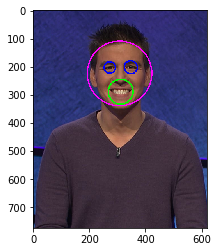

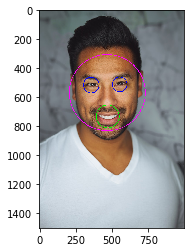

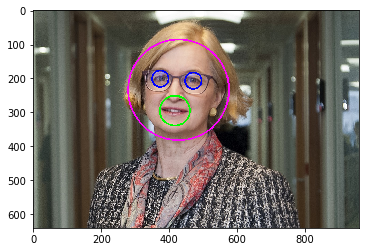

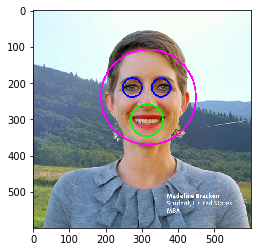

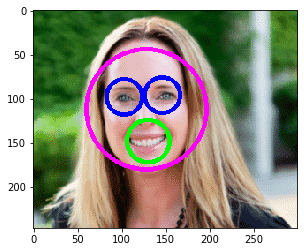

In [4]:
# todo astronut picture ...
from __future__ import print_function
import cv2 as cv
import argparse
from matplotlib import pyplot

def detectAndDisplay(frame,flag):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)

    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray,1.3,5)

    # drawing Faces ...
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI,minSize=(30,30),maxSize=(65,65))
        
        if(flag == 1):
            eyes = eyes_cascade.detectMultiScale(faceROI,minSize=(45,45))
        
        # drawing Eyes ...
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

        smile = smile_cascade.detectMultiScale(faceROI,1.8,18)
        
        # drawing best detected Smile ...
        counter = 1
        for (x2, y2, w2, h2) in smile:
            if(counter == len(smile)):
                smile_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
                radius = int(round((w2 + h2) * 0.25))
                frame = cv.circle(frame, smile_center, radius, (0, 255, 0), 4)
                break
            counter += 1
            
    cv.imshow("image",frame)
    cv.waitKey(0)
    
    b,g,r = cv.split(frame)       # get b,g,r
    img = cv.merge([r,g,b])     # switch it to rgb
    pyplot.imshow(img)
    pyplot.show()


parser = argparse.ArgumentParser()
parser.add_argument('-f')

# reading given XML files ...
parser.add_argument('--face_cascade', help='Path to face cascade.', default='haarcascade_frontalface_default.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='haarcascade_eye.xml')
parser.add_argument('--smile_cascade', help='Path to smile cascade.', default='haarcascade_smile.xml')

# parsing arguments ...
args = parser.parse_args()

# cascading ...
face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade
smile_cascade_name = args.smile_cascade

# getting classifier ...
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
smile_cascade = cv.CascadeClassifier()

# according to OPENCV document ...
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)
if not smile_cascade.load(cv.samples.findFile(smile_cascade_name)):
    print('--(!)Error loading smile cascade')
    exit(0)
    
# let's draw ...
flagResize = 0
t1 = cv.imread('TestImages/img1.jpg')
detectAndDisplay(t1,flagResize)

# this image needs modification in detectMultiScale function ...
t2 = cv.imread('TestImages/img2.jpg')
flagResize = 1
detectAndDisplay(t2,flagResize)

t3 = cv.imread('TestImages/img3.jpg')
# Revert changes ...
flagResize = 0
detectAndDisplay(t3,flagResize)

t4 = cv.imread('TestImages/img4.jpg')
detectAndDisplay(t4,flagResize)

t5 = cv.imread('TestImages/img5.png')
detectAndDisplay(t5,flagResize)

cv.destroyAllWindows()

# Section 2

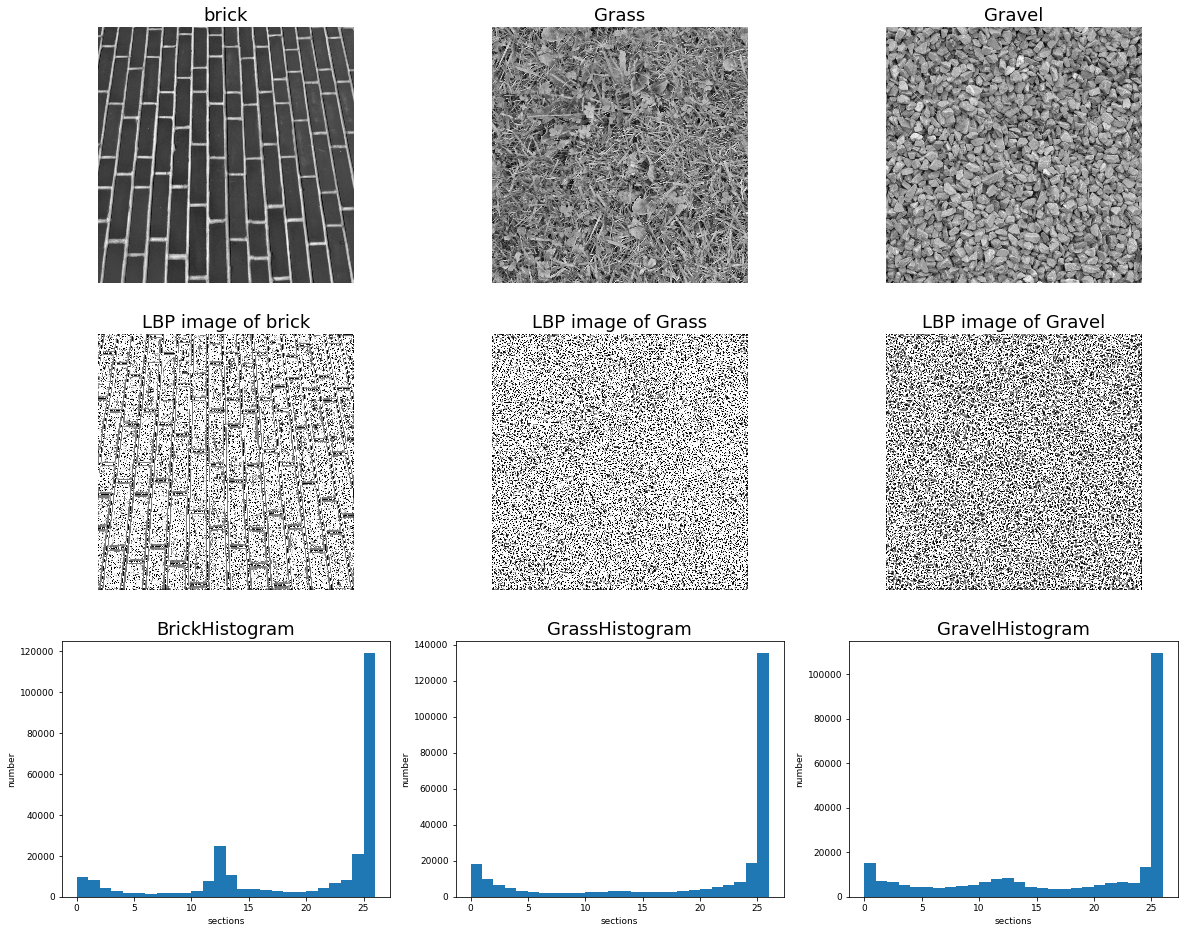

In [3]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import matplotlib.pyplot as plt


# settings for LBP
radius = 3
n_points = 8 * radius
METHOD = 'uniform'
P = n_points

brick = data.brick()
grass = data.grass()
gravel = data.gravel()

brick_lbp=local_binary_pattern(brick, n_points, radius, METHOD)
grass_lbp=local_binary_pattern(grass, n_points, radius, METHOD)
gravel_lbp=local_binary_pattern(gravel, n_points, radius, METHOD)

plt.rcParams['font.size'] = 9
# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3),
      (ax4, ax5, ax6),
      (ax7, ax8, ax9)) = plt.subplots(nrows = 3,ncols = 3,figsize=(20, 16))
plt.gray()

plt.rcParams['font.size'] = 15
# MAIN images ...
ax1.imshow(brick)
ax1.set_title('brick')
ax1.axis('off')

ax2.imshow(grass)
ax2.set_title('Grass')
ax2.axis('off')

ax3.imshow(gravel)
ax3.set_title('Gravel')
ax3.axis('off')

# LBP  images ...
ax4.imshow(brick_lbp)
ax4.set_title('LBP image of brick')
ax4.axis('off')

ax5.imshow(grass_lbp)
ax5.set_title('LBP image of Grass')
ax5.axis('off')

ax6.imshow(gravel_lbp)
ax6.set_title('LBP image of Gravel')
ax6.axis('off')

# HISTOGRAM of LBPs
ax7.hist(brick_lbp.ravel(), bins=P + 2, range=(0, P + 2))
ax7.set_title('BrickHistogram')

ax7.set_xlabel('sections')
ax7.set_ylabel('number')

ax8.hist(grass_lbp.ravel(), bins=P + 2, range=(0, P + 2))
ax8.set_title('GrassHistogram')
ax8.set_xlabel('sections')
ax8.set_ylabel('number')

ax9.hist(gravel_lbp.ravel(), bins=P + 2, range=(0, P + 2))
ax9.set_title('GravelHistogram')
ax9.set_xlabel('sections')
ax9.set_ylabel('number')


plt.show()